# Notes

## My App Architecture Idea

- Display a rolling list with images previews & ids
- Display the interface with text input (for id) and output the RGB image, the mask, the predicted mask blending with RGB

## Gradio Quick Start Guide 2024

### How to Install Gradio

`pip install -U gradio`

### Basic structure

- Main function : Serving as the engine
- Interface class
    - More than 30 gradio components available for inputs & outputs as : textbox (alias text), image, slider, number
    - Each gradio components has a corresponding Class but they can ba called as a string in inputs or outputs
    - Others examples for outputs : textbox, image, label, audio
    - It connects the input from user to the output displayed and function computing
- Flag, in UI, helps you save the results as a csv file into .gradio folder

In [1]:
def greet(name, intensity): # the args will appear in the same way if you use string in inputs/outputs args of gr.Interface
    return "Hello, " + name + "!" * int(intensity)

In [3]:
greet("Julien", "4")

'Hello, Julien!!!!'

In [4]:
# Use strings for quick iteration

import gradio as gr

demo = gr.Interface(
    fn=greet,
    # Expecting 2 inputs from user for greet fn
    inputs=[
        "textbox", # Text Input
        "slider", # Slider to select an integer value
        ],
    # greet fn return one text output
    outputs=["text"], # Text Output
)

demo.launch()

/home/hedredo/github/learning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [10]:
# Use classes for full customization

import gradio as gr

demo = gr.Interface(
    fn=greet,
    # Expecting 2 inputs from user for greet fn
    inputs=[
        gr.Textbox(label="Enter your text below:"), # Text Input
        gr.Slider(minimum=0, maximum=50, label="Select the intensity"), # Slider to select an integer value
        ],
    # greet fn return one text output
    outputs=[gr.Textbox(label="Resulting: ")], # Text Output
    # set your title
    title="Hello App",
    description="Make this day a great day :)"
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7866
* Running on public URL: https://c2f52cbc0a75aeee0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Project

## Pipeline

2025-03-05 18:25:44.509010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741195544.784035  135618 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741195544.854093  135618 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 18:25:45.430743: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


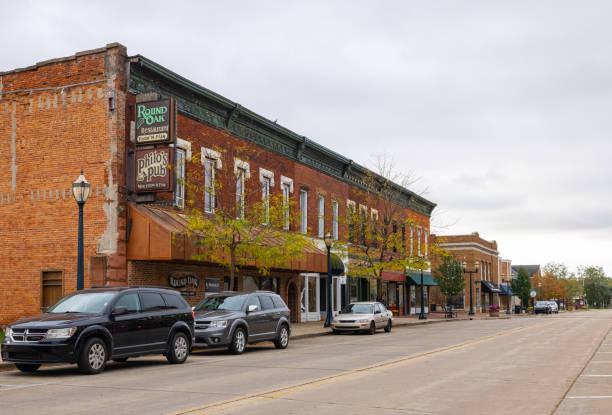

In [1]:
from transformers import pipeline
from PIL import Image
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [3]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

In [4]:
import numpy as np

# Init the list for the new masks
new_masks = []

# Create a list of arrays with every masks with their corresponding values in palette
for i, result in enumerate(results, start=1):
    arr = np.array(result["mask"])
    arr[arr==255] = i
    new_masks.append(arr)

# Sum all the masks to get the final mask
final_mask = np.sum(new_masks, axis=0)

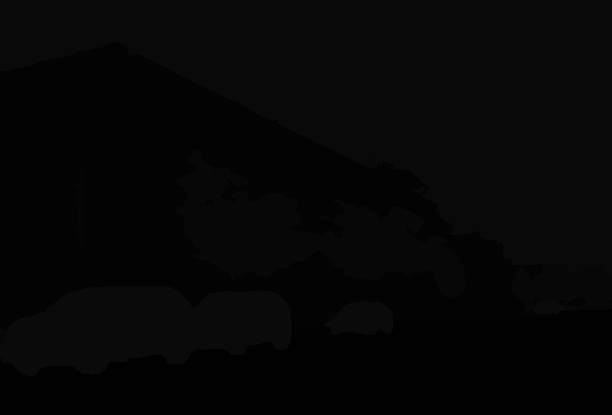

In [5]:
# Create a PIL image from the final mask
final_mask_image = Image.fromarray(final_mask.astype(np.uint8))
final_mask_image

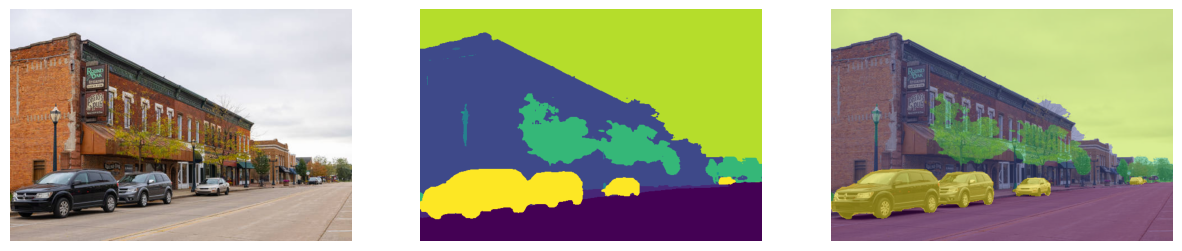

In [6]:
import matplotlib.pyplot as plt

# Display the image and the final mask and both superposed
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].axis("off")  
ax[1].imshow(final_mask, cmap="viridis")
ax[1].axis("off")
ax[2].imshow(image)
ax[2].imshow(final_mask, cmap="viridis", alpha=0.5)
ax[2].axis("off")
plt.show()

## Code validated

### Images importés depuis des filepath mixtes (url web et local)

In [ ]:
import os
import gradio as gr
from PIL import Image
import numpy as np

# Bloc avec les exemples affichés
examples = [
    ["https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"],
    ["/home/hedredo/github/learning/gradio/pexels-photo-8645992.jpeg"],
]

# Bloc avec les inputs
image_input = gr.Image(type="filepath", label="Image to segment")

# Bloc output qui contient l'image segmentée par la fontion segment_image
image_output = gr.Image(type="pil", label="Segmented Image")

# Bloc avec les fonctions
def segment_image(image):
    results = semantic_segmentation(image)
    new_masks = []
    for i, result in enumerate(results, start=1):
        arr = np.array(result["mask"])
        arr[arr==255] = i
        new_masks.append(arr)
    final_mask = np.sum(new_masks, axis=0).squeeze()
    return Image.fromarray(final_mask.astype(np.uint8))

# Bloc avec l'interface
demo = gr.Interface(
    fn=segment_image,
    inputs=image_input,
    outputs=image_output,
    examples=examples,
    title="Image Segmentation",
    description="Segment the image using the Segformer model",
)

demo.launch(share=False)

* Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


### Images importées depuis un sous-dossier

In [ ]:
import os
import gradio as gr
from PIL import Image
import numpy as np

folder = "images"
images_folder = os.getcwd() + "/" + folder
examples = [
    folder + "/" + image
    for image in os.listdir(images_folder)
]


# Bloc avec les inputs
image_input = gr.Image(type="filepath", label="Image to segment")

# Bloc output qui contient l'image segmentée par la fontion segment_image
image_output = gr.Image(type="pil", label="Segmented Image")

# Bloc avec les fonctions
def segment_image(image):
    results = semantic_segmentation(image)
    new_masks = []
    for i, result in enumerate(results, start=1):
        arr = np.array(result["mask"])
        arr[arr==255] = i
        new_masks.append(arr)
    final_mask = np.sum(new_masks, axis=0).squeeze()
    return Image.fromarray(final_mask.astype(np.uint8))

# Bloc avec l'interface
demo = gr.Interface(
    fn=segment_image,
    inputs=image_input,
    outputs=image_output,
    examples=examples,
    title="Image Segmentation",
    description="Segment the image using the Segformer model",
)

demo.launch(share=False, allowed_paths=[images_folder]) 

### Images importées depuis le répertoire courant

In [46]:
import os
import gradio as gr
from PIL import Image
import numpy as np

examples = [
    image
    for image in os.listdir(os.getcwd())
    if image.endswith("g")
]


# Bloc avec les inputs
image_input = gr.Image(type="filepath", label="Image to segment")

# Bloc output qui contient l'image segmentée par la fontion segment_image
image_output = gr.Image(type="pil", label="Segmented Image")

# Bloc avec les fonctions
def segment_image(image):
    results = semantic_segmentation(image)
    new_masks = []
    for i, result in enumerate(results, start=1):
        arr = np.array(result["mask"])
        arr[arr==255] = i
        new_masks.append(arr)
    final_mask = np.sum(new_masks, axis=0).squeeze()
    return Image.fromarray(final_mask.astype(np.uint8))

# Bloc avec l'interface
demo = gr.Interface(
    fn=segment_image,
    inputs=image_input,
    outputs=image_output,
    examples=examples,
    title="Image Segmentation",
    description="Segment the image using the Segformer model",
)

demo.launch(share=False, allowed_paths=[images_folder]) 

* Running on local URL:  http://127.0.0.1:7872

To create a public link, set `share=True` in `launch()`.


### Liste déroulante d'exemple avec une image+exemple par défaut montré

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image

# Création des exemples
folder = "images"
images_folder = os.getcwd() + "/" + folder
examples = [
    folder + "/" + image
    for image in os.listdir(images_folder)
]

# Liste des fichiers d'exemple disponibles et renvoie nom image: chemin image
example_files = { 
    f"image_{img_id}": img_path for img_id, img_path in enumerate(examples)
}

# Bloc avec les fonctions
def segment_image(image):
    results = semantic_segmentation(image)
    new_masks = []
    for i, result in enumerate(results, start=1):
        arr = np.array(result["mask"])
        arr[arr==255] = i
        new_masks.append(arr)
    final_mask = np.sum(new_masks, axis=0).squeeze()
    return Image.fromarray(final_mask.astype(np.uint8))

# Liste des fichiers d'exemple disponibles
example_files = { 
    f"image_{img_id}": img_path for img_id, img_path in enumerate(examples)
}

# Fonction pour charger l'image sélectionnée
def load_example(example_name):
    return example_files[example_name]  # Retourne le chemin de l'image sélectionnée

with gr.Blocks() as demo:
    gr.Markdown("# Image Segmentation avec Liste Déroulante")
    with gr.Row():
        dropdown = gr.Dropdown(
            label="Choisissez un exemple",
            choices=list(example_files.keys()),
            value=list(example_files.keys())[0],  # Valeur par défaut
        )
    
    with gr.Row():
        image_input = gr.Image(value=list(example_files.values())[0], type="filepath", label="Image à segmenter")
        image_output = gr.Image(type="pil", label="Image segmentée")

        # Charger l'exemple sélectionné
        dropdown.change(load_example, dropdown, image_input)

    with gr.Row():
        # Bouton pour lancer la segmentation
        submit_btn = gr.Button("Segmenter")
        submit_btn.click(segment_image, inputs=image_input, outputs=image_output)

demo.launch(share=False, allowed_paths=["/home/hedredo/github/learning/gradio/images"])

### Multiple outputs

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image

# TODO: Dans le vrai répertoire de l'app, il faudra créer ce répertoire images
folder = "images"
images_folder = os.getcwd() + "/" + folder
examples = [
    folder + "/" + image
    for image in os.listdir(images_folder)
]

# TODO: Créer une fonction extractrice d'ID

# Liste des fichiers d'exemple disponibles et renvoie un dictionnaire id: path
example_files = { 
    f"image_{img_id}": img_path for img_id, img_path in enumerate(examples) # TODO: remplacer la clé par l'id de l'image
}

# Liste des fichiers d'exemple disponibles
example_files = { 
    f"image_{img_id}": img_path for img_id, img_path in enumerate(examples)
}

# Fonction pour charger l'image sélectionnée
def load_example(example_name):
    return example_files[example_name]  # Retourne le chemin de l'image sélectionnée

# Bloc avec les fonctions
def segment_image(image):
    results = semantic_segmentation(image)
    new_masks = []
    for i, result in enumerate(results, start=1):
        arr = np.array(result["mask"])
        arr[arr==255] = i
        new_masks.append(arr)
    final_mask = np.sum(new_masks, axis=0).squeeze()
    return Image.fromarray(final_mask.astype(np.uint8)), Image.fromarray(final_mask.astype(np.uint8))

# Gradio code
with gr.Blocks() as demo:
    gr.Markdown("# Image Segmentation avec Liste Déroulante")
    with gr.Row():
        dropdown = gr.Dropdown(
            label="Choisissez un exemple",
            choices=list(example_files.keys()),
            value=list(example_files.keys())[0],  # Valeur par défaut
        )
    
    with gr.Row():
        image_input = gr.Image(value=list(example_files.values())[0], type="filepath", label="Image à segmenter")
        image_output = [
            gr.Image(type="pil", label="Mask greyscale"),
            gr.Image(type="pil", label="Masque blending"),
        ]
        # Charger l'exemple sélectionné
        dropdown.change(fn=load_example, inputs=dropdown, outputs=image_input)

    with gr.Row():
        # Bouton pour lancer la segmentation
        submit_btn = gr.Button("Segmenter")
        submit_btn.click(segment_image, inputs=image_input, outputs=image_output)

demo.launch(share=False, allowed_paths=["/home/hedredo/github/learning/gradio/images"])

## Gradio

In [10]:
import gradio as gr
import numpy as np
from PIL import Image

# TODO: Dans le vrai répertoire de l'app, il faudra créer ce répertoire images
folder = "images"
images_folder = os.getcwd() + "/" + folder
examples = [
    folder + "/" + image
    for image in os.listdir(images_folder)
]

# TODO: Créer une fonction extractrice d'ID

# Liste des fichiers d'exemple disponibles et renvoie un dictionnaire id: path
example_files = { 
    f"image_{img_id}": img_path for img_id, img_path in enumerate(examples) # TODO: remplacer la clé par l'id de l'image
}

# Liste des fichiers d'exemple disponibles
example_files = { 
    f"image_{img_id}": img_path for img_id, img_path in enumerate(examples)
}

# Fonction pour charger l'image sélectionnée
def load_example(example_name):
    return example_files[example_name]  # Retourne le chemin de l'image sélectionnée

# Bloc avec les fonctions
def segment_image(image):
    results = semantic_segmentation(image)
    new_masks = []
    pil_masks = []
    for i, result in enumerate(results, start=1):
        arr = np.array(result["mask"])
        pil_masks.append(arr)
        arr[arr==255] = i
        new_masks.append(arr)
    final_mask = np.sum(new_masks, axis=0).squeeze().astype(np.uint8)

    # Liste des labels pour chaque classe (excluant la classe 0 qui est l'arrière-plan)
    labels = ["Classe 1", "Classe 2", "Classe 3", "Classe 4", "Classe 5",
          "Classe 6", "Classe 7", "Classe 8", "Classe 9", "Classe 10"]

    # Créer une liste d'annotations (masques binaires + labels)
    annotations = [
        ((np.array(mask) == class_id).astype(np.uint8), label)  # (Masque binaire, Label)
        for class_id, (mask, label) in enumerate(zip(pil_masks, labels), start=1)
    ]

    return final_mask, (image, annotations)

# Gradio code
with gr.Blocks() as demo:
    gr.Markdown("# Image Segmentation avec Liste Déroulante")
    with gr.Row():
        dropdown = gr.Dropdown(
            label="Choisissez un exemple",
            choices=list(example_files.keys()),
            value=list(example_files.keys())[0],  # Valeur par défaut
        )
    
    with gr.Row():
        image_input = gr.Image(value=list(example_files.values())[0], type="filepath", label="Image à segmenter")
        image_output = [
            gr.Image(type="pil", label="Mask greyscale"),
            gr.AnnotatedImage(label="Masque blending"),
        ]
        # Charger l'exemple sélectionné
        dropdown.change(fn=load_example, inputs=dropdown, outputs=image_input)

    with gr.Row():
        # Bouton pour lancer la segmentation
        submit_btn = gr.Button("Segmenter")
        submit_btn.click(segment_image, inputs=image_input, outputs=image_output)

demo.launch(share=False, allowed_paths=["/home/hedredo/github/learning/gradio/images"])


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [1]:
import gradio as gr
import numpy as np
import random

with gr.Blocks() as demo:
    section_labels = [
        "apple",
        "banana",
        "carrot",
        "donut",
        "eggplant",
        "fish",
        "grapes",
        "hamburger",
        "ice cream",
        "juice",
    ]

    with gr.Row():
        num_boxes = gr.Slider(0, 5, 2, step=1, label="Number of boxes")
        num_segments = gr.Slider(0, 5, 1, step=1, label="Number of segments")

    with gr.Row():
        img_input = gr.Image()
        img_output = gr.AnnotatedImage(
            color_map={"banana": "#a89a00", "carrot": "#ffae00"}
        )

    section_btn = gr.Button("Identify Sections")
    selected_section = gr.Textbox(label="Selected Section")

    def section(img, num_boxes, num_segments):
        sections = []
        for a in range(num_boxes):
            x = random.randint(0, img.shape[1])
            y = random.randint(0, img.shape[0])
            w = random.randint(0, img.shape[1] - x)
            h = random.randint(0, img.shape[0] - y)
            sections.append(((x, y, x + w, y + h), section_labels[a]))
        for b in range(num_segments):
            x = random.randint(0, img.shape[1])
            y = random.randint(0, img.shape[0])
            r = random.randint(0, min(x, y, img.shape[1] - x, img.shape[0] - y))
            mask = np.zeros(img.shape[:2])
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    dist_square = (i - y) ** 2 + (j - x) ** 2
                    if dist_square < r**2:
                        mask[i, j] = round((r**2 - dist_square) / r**2 * 4) / 4
            sections.append((mask, section_labels[b + num_boxes]))
        return (img, sections)

    section_btn.click(section, [img_input, num_boxes, num_segments], img_output)

    def select_section(evt: gr.SelectData):
        return section_labels[evt.index]

    img_output.select(select_section, None, selected_section)

if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
